In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64)  # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2023-12-02 21:32:00.297776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 21:32:00.297832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 21:32:00.298033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 21:32:00.391371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.14.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

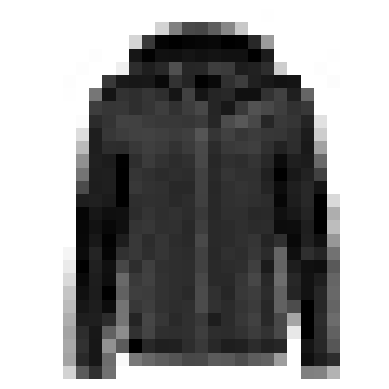

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# to make this notebook's output stable across runs
np.random.seed(42)

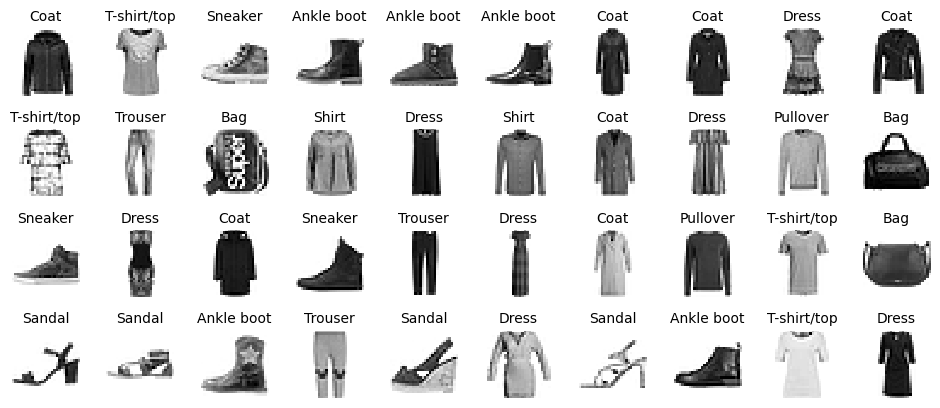

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2023-12-02 21:32:06.999913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-02 21:32:07.191140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-02 21:32:07.191773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[3].name

'dense_2'

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[-0.00478221, -0.00333482, -0.03600949, ...,  0.02925962,
        -0.0717968 ,  0.00617939],
       [-0.00870778, -0.05998761,  0.05163807, ...,  0.02091916,
        -0.01968123,  0.00487755],
       [ 0.01843469,  0.03737093, -0.06053314, ...,  0.07176271,
         0.02868219,  0.03877264],
       ...,
       [ 0.02610216,  0.04012233,  0.06309259, ..., -0.03108507,
        -0.05745096, -0.0082382 ],
       [-0.00080784,  0.05091633,  0.02724218, ..., -0.06145466,
        -0.02939223,  0.05394274],
       [-0.02301829, -0.04037295,  0.0459659 , ..., -0.00338965,
        -0.07023993,  0.03833221]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-12-02 21:32:11.291790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f46480198a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-02 21:32:11.291829: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-12-02 21:32:11.552213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-12-02 21:32:11.642043: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7202 - accuracy: 0.7653 - val_loss: 0.5369 - val_accuracy: 0.8080
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4885 - accuracy: 0.8290 - val_loss: 0.4413 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8447 - val_loss: 0.4151 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4175 - accuracy: 0.8536 - val_loss: 0.4150 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3961 - accuracy: 0.8617 - val_loss: 0.3906 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8663 - val_loss: 0.3732 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3684 - accuracy: 0.8704 - val_loss: 0.3615 - val_accuracy: 0.8730
Epo

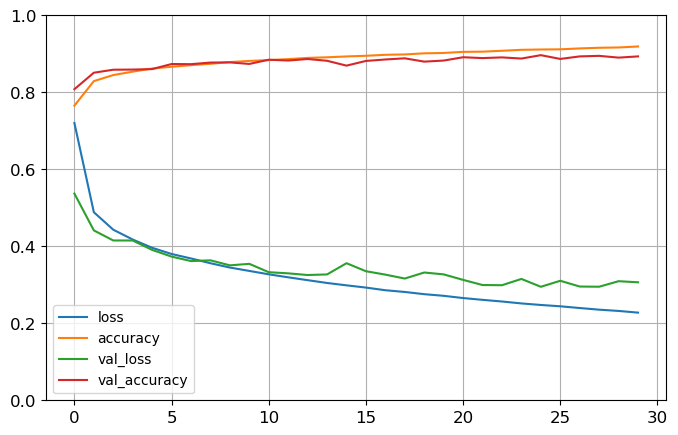

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.8310 - accuracy: 0.8382


[71.83100891113281, 0.8381999731063843]

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2249 - accuracy: 0.9201 - val_loss: 0.2977 - val_accuracy: 0.8952
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2206 - accuracy: 0.9217 - val_loss: 0.2960 - val_accuracy: 0.8934
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9231 - val_loss: 0.3044 - val_accuracy: 0.8936
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2137 - accuracy: 0.9233 - val_loss: 0.2976 - val_accuracy: 0.8942
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2109 - accuracy: 0.9249 - val_loss: 0.3047 - val_accuracy: 0.8926
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2068 - accuracy: 0.9265 - val_loss: 0.3006 - val_accuracy: 0.8916
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2029 - accuracy: 0.9274 - val_loss: 0.3017 - val_accuracy:

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.5604 - accuracy: 0.8477


[75.56037902832031, 0.8476999998092651]

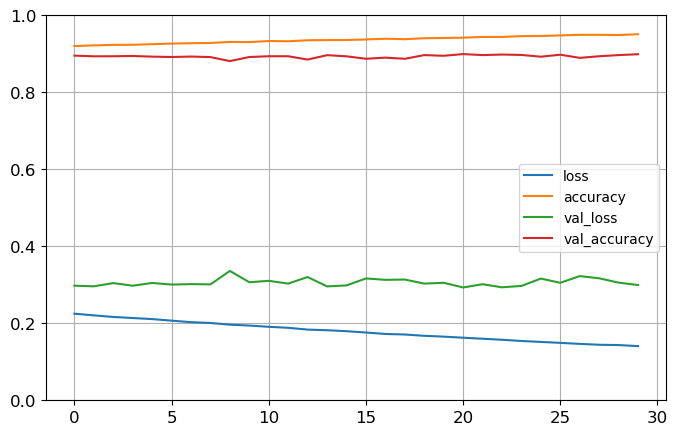

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 70ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 19ms/step


array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

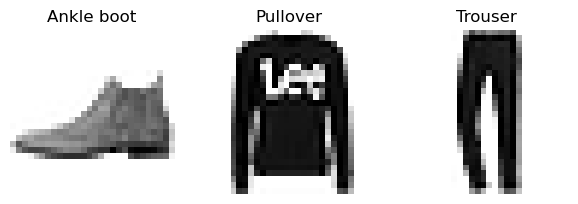

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [34]:
# BUILDING A REGRESSION MLP USING THE SEQUENTIAL API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8266 - val_loss: 0.5734
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5149 - val_loss: 0.5257
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5181 - val_loss: 0.5068
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4748 - val_loss: 0.4661
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4411 - val_loss: 0.4577
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4268 - val_loss: 0.4434
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4202 - val_loss: 0.4443
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4132 - val_loss: 0.4347
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4075 - val_loss: 0.4292
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4031 - val_loss: 0.4339

In [36]:
mse_test

1.3365141153335571

In [37]:
y_pred

array([[0.25289172],
       [2.1239107 ],
       [7.234546  ]], dtype=float32)

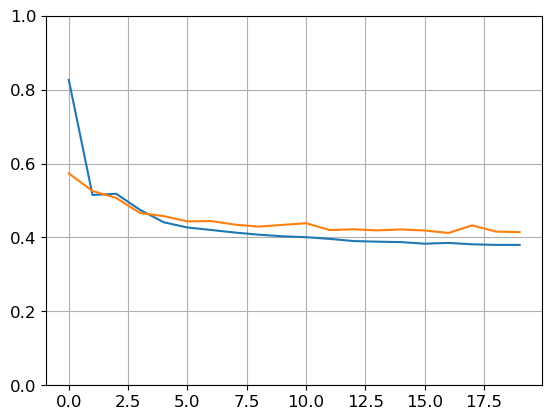

In [38]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
# BUILDING COMPLEXE MODELS USING THE FUNCTIONAL API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.6856 - val_loss: 0.5612
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7310 - val_loss: 0.4903
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5353 - val_loss: 0.4647
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4343 - val_loss: 0.4551
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4390 - val_loss: 0.4650
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4147 - val_loss: 0.5591
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8749 - val_loss: 0.4339
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4038 - val_loss: 0.6549
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3105 - val_loss: 0.4337
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4107 - val_loss: 0.5992

In [40]:
mse_test

3.34883975982666

In [41]:
y_pred

array([[0.24095872],
       [2.4939623 ],
       [9.944748  ]], dtype=float32)

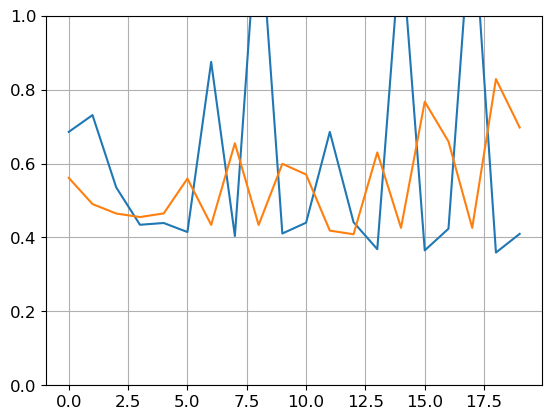

In [42]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.6737 - val_loss: 1.0033
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8481 - val_loss: 0.7233
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6924 - val_loss: 0.6689
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6521 - val_loss: 0.6370
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6245 - val_loss: 0.6175
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6029 - val_loss: 0.5998
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5870
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5707 - val_loss: 0.5767
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5589 - val_loss: 0.5660
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5493 - val_loss: 0.5603

In [45]:
mse_test

0.504862904548645

In [46]:
y_pred

array([[0.73625857],
       [1.8419306 ],
       [2.7676349 ]], dtype=float32)

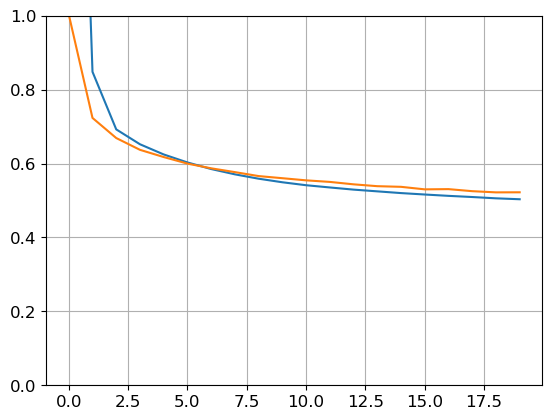

In [47]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [49]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8980 - main_output_loss: 0.8455 - aux_output_loss: 1.3708 - val_loss: 0.5868 - val_main_output_loss: 0.5410 - val_aux_output_loss: 0.9991
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5239 - main_output_loss: 0.4858 - aux_output_loss: 0.8671 - val_loss: 0.5132 - val_main_output_loss: 0.4747 - val_aux_output_loss: 0.8592
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4884 - main_output_loss: 0.4583 - aux_output_loss: 0.7588 - val_loss: 0.4950 - val_main_output_loss: 0.4632 - val_aux_output_loss: 0.7813
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4658 - main_output_loss: 0.4397 - aux_output_loss: 0.7005 - val_loss: 0.4802 - val_main_output_loss: 0.4520 - val_aux_output_loss: 0.7336
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4619 - main_output_loss: 0.4387 - aux_output_loss: 0.6709 - val_loss

In [50]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 3.0566 - main_output_loss: 3.0182 - aux_output_loss: 3.4029


In [51]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 57ms/step


In [52]:
# USING THE SUBCLASSING API TO BUILD DYNAMIC MODELS

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [53]:
model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9729 - output_1_loss: 0.8657 - output_2_loss: 1.9376 - val_loss: 0.6146 - val_output_1_loss: 0.5557 - val_output_2_loss: 1.1453
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5459 - output_1_loss: 0.4957 - output_2_loss: 0.9983 - val_loss: 0.5455 - val_output_1_loss: 0.5011 - val_output_2_loss: 0.9451
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5015 - output_1_loss: 0.4639 - output_2_loss: 0.8393 - val_loss: 0.5087 - val_output_1_loss: 0.4728 - val_output_2_loss: 0.8321
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4785 - output_1_loss: 0.4487 - output_2_loss: 0.7466 - val_loss: 0.4911 - val_output_1_loss: 0.4613 - val_output_2_loss: 0.7596
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4640 - output_1_loss: 0.4387 - output_2_loss: 0.6908 - val_loss: 0.4742 - val_output_1_loss: 0.4476 - val_ou

In [54]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 3.4102 - output_1_loss: 3.4688 - output_2_loss: 2.8821


In [55]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 54ms/step


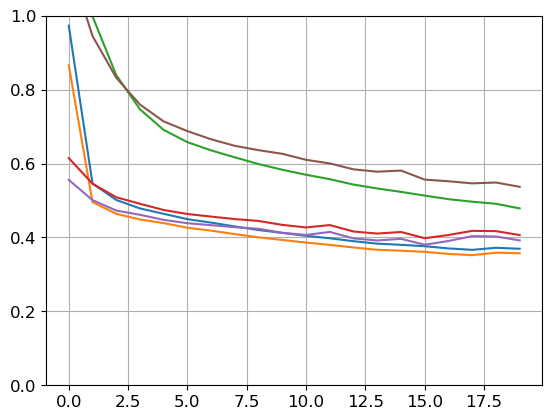

In [56]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
# SAVING AND RESTORING A MODEL AND USING CALLBACKS

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [58]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")  # roll back to the best model

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3722 - main_output_loss: 0.3592 - aux_output_loss: 0.4889 - val_loss: 0.4141 - val_main_output_loss: 0.3987 - val_aux_output_loss: 0.5520
Epoch 2/10
 51/363 [===>..........................] - ETA: 0s - loss: 0.3487 - main_output_loss: 0.3369 - aux_output_loss: 0.4555

/usr/local/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.3694 - main_output_loss: 0.3569 - aux_output_loss: 0.4824 - val_loss: 0.4308 - val_main_output_loss: 0.4166 - val_aux_output_loss: 0.5583
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3664 - main_output_loss: 0.3542 - aux_output_loss: 0.4768 - val_loss: 0.4120 - val_main_output_loss: 0.3957 - val_aux_output_loss: 0.5584
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3646 - main_output_loss: 0.3526 - aux_output_loss: 0.4728 - val_loss: 0.4078 - val_main_output_loss: 0.3931 - val_aux_output_loss: 0.5402
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3599 - main_output_loss: 0.3481 - aux_output_loss: 0.4659 - val_loss: 0.4163 - val_main_output_loss: 0.4018 - val_aux_output_loss: 0.5465
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3565 - main_output_loss: 0.3450 - aux_output_loss: 0.4606 - val_loss: 0.4023 - 

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3507 - main_output_loss: 0.3396 - aux_output_loss: 0.4505 - val_loss: 0.4133 - val_main_output_loss: 0.4000 - val_aux_output_loss: 0.5331
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3478 - main_output_loss: 0.3369 - aux_output_loss: 0.4459 - val_loss: 0.4186 - val_main_output_loss: 0.4047 - val_aux_output_loss: 0.5435
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3484 - main_output_loss: 0.3379 - aux_output_loss: 0.4435 - val_loss: 0.4048 - val_main_output_loss: 0.3917 - val_aux_output_loss: 0.5228
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3467 - main_output_loss: 0.3363 - aux_output_loss: 0.4410 - val_loss: 0.3993 - val_main_output_loss: 0.3853 - val_aux_output_loss: 0.5257
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3451 - main_output_loss: 0.3346 - aux_output_loss: 0.4394 - val

In [60]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [61]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=1,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[val_train_ratio_cb])

351/363 [============================>.] - ETA: 0s - loss: 0.3309 - main_output_loss: 0.3217 - aux_output_loss: 0.4141
val/train: 1.19
363/363 [==============================] - 1s 4ms/step - loss: 0.3305 - main_output_loss: 0.3213 - aux_output_loss: 0.4135 - val_loss: 0.3933 - val_main_output_loss: 0.3809 - val_aux_output_loss: 0.5045


In [62]:
# USING TENSORBOARD FOR VISUALISATION

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()  # e.g., './my_logs/run_2023_12_02-21_54_48

In [63]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3302 - main_output_loss: 0.3211 - aux_output_loss: 0.4126 - val_loss: 0.4173 - val_main_output_loss: 0.4057 - val_aux_output_loss: 0.5220
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3292 - main_output_loss: 0.3201 - aux_output_loss: 0.4112 - val_loss: 0.3932 - val_main_output_loss: 0.3811 - val_aux_output_loss: 0.5023
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3294 - main_output_loss: 0.3204 - aux_output_loss: 0.4101 - val_loss: 0.3841 - val_main_output_loss: 0.3715 - val_aux_output_loss: 0.4976
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3290 - main_output_loss: 0.3201 - aux_output_loss: 0.4089 - val_loss: 0.4043 - val_main_output_loss: 0.3926 - val_aux_output_loss: 0.5100
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3295 - main_output_loss: 0.3210 - aux_output_loss: 0.4064 - val